In [1]:
using DelimitedFiles
using PyCall
using PyPlot
using Statistics
using LaTeXStrings
using GLM
using DataFrames

In [2]:
E_ref60 = readdlm("../data/figures/data_fig5/E_ref60.0")[:]
E_ref30 = readdlm("../data/figures/data_fig5/E_ref30.0")[:]
E_ref10 = readdlm("../data/figures/data_fig5/E_ref10.0")[:]
E_seq60 = readdlm("../data/figures/data_fig5/E_seq60.0")[:]
E_seq30 = readdlm("../data/figures/data_fig5/E_seq30.0")[:]
E_seq10 = readdlm("../data/figures/data_fig5/E_seq10.0")[:]

dF_ref30 = readdlm("../data/figures/data_fig5/dF_ref30.0")[:]
dF_ref10 = readdlm("../data/figures/data_fig5/dF_ref10.0")[:]
dF_seq30 = readdlm("../data/figures/data_fig5/dF_seq30.0")[:]
dF_seq10 = readdlm("../data/figures/data_fig5/dF_seq10.0")[:]

d = readdlm("../data/figures/data_fig5/d")[:]
d_exp = readdlm("../data/figures/data_fig5/d_exp")[:]
median_abund = readdlm("../data/figures/data_fig5/median_abund")[:]
l_abund = readdlm("../data/figures/data_fig5/l_abund")[:]
u_abund = readdlm("../data/figures/data_fig5/u_abund")[:]

ab_m_exp = readdlm("../data/figures/data_fig5/ab_m_exp")[:]
;

In [3]:
dF = readdlm("../data/figures/data_fig4/exp_fitness")[:]
dE = readdlm("../data/figures/data_fig4/dca_scores")[:]
;

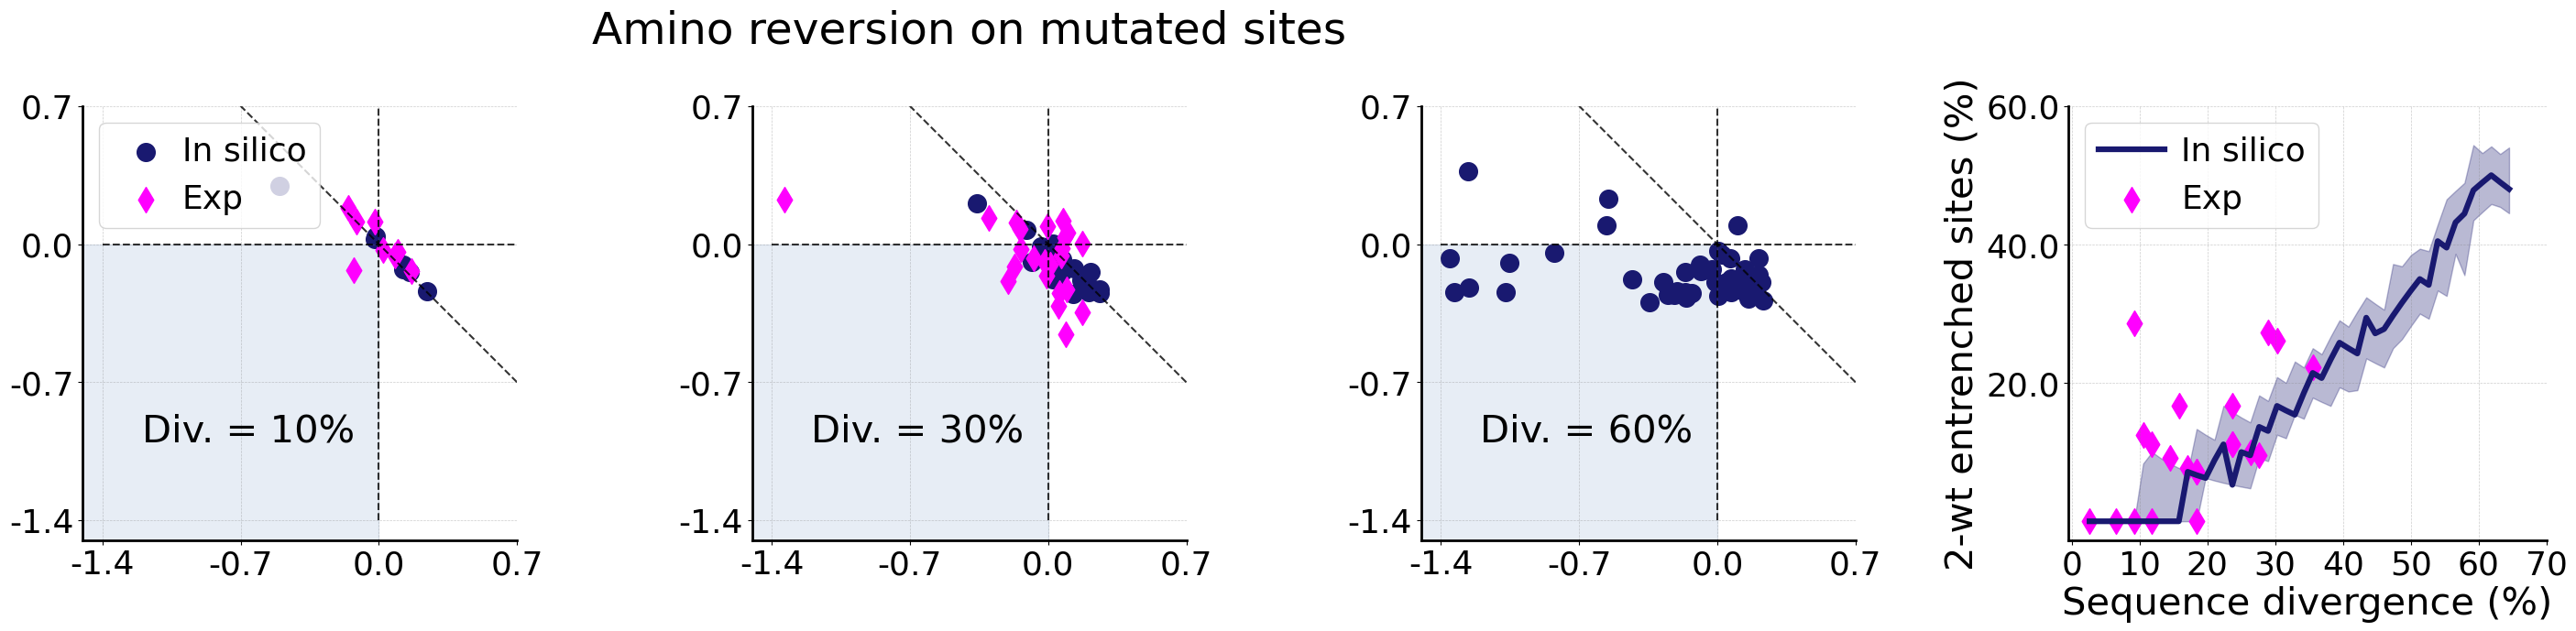

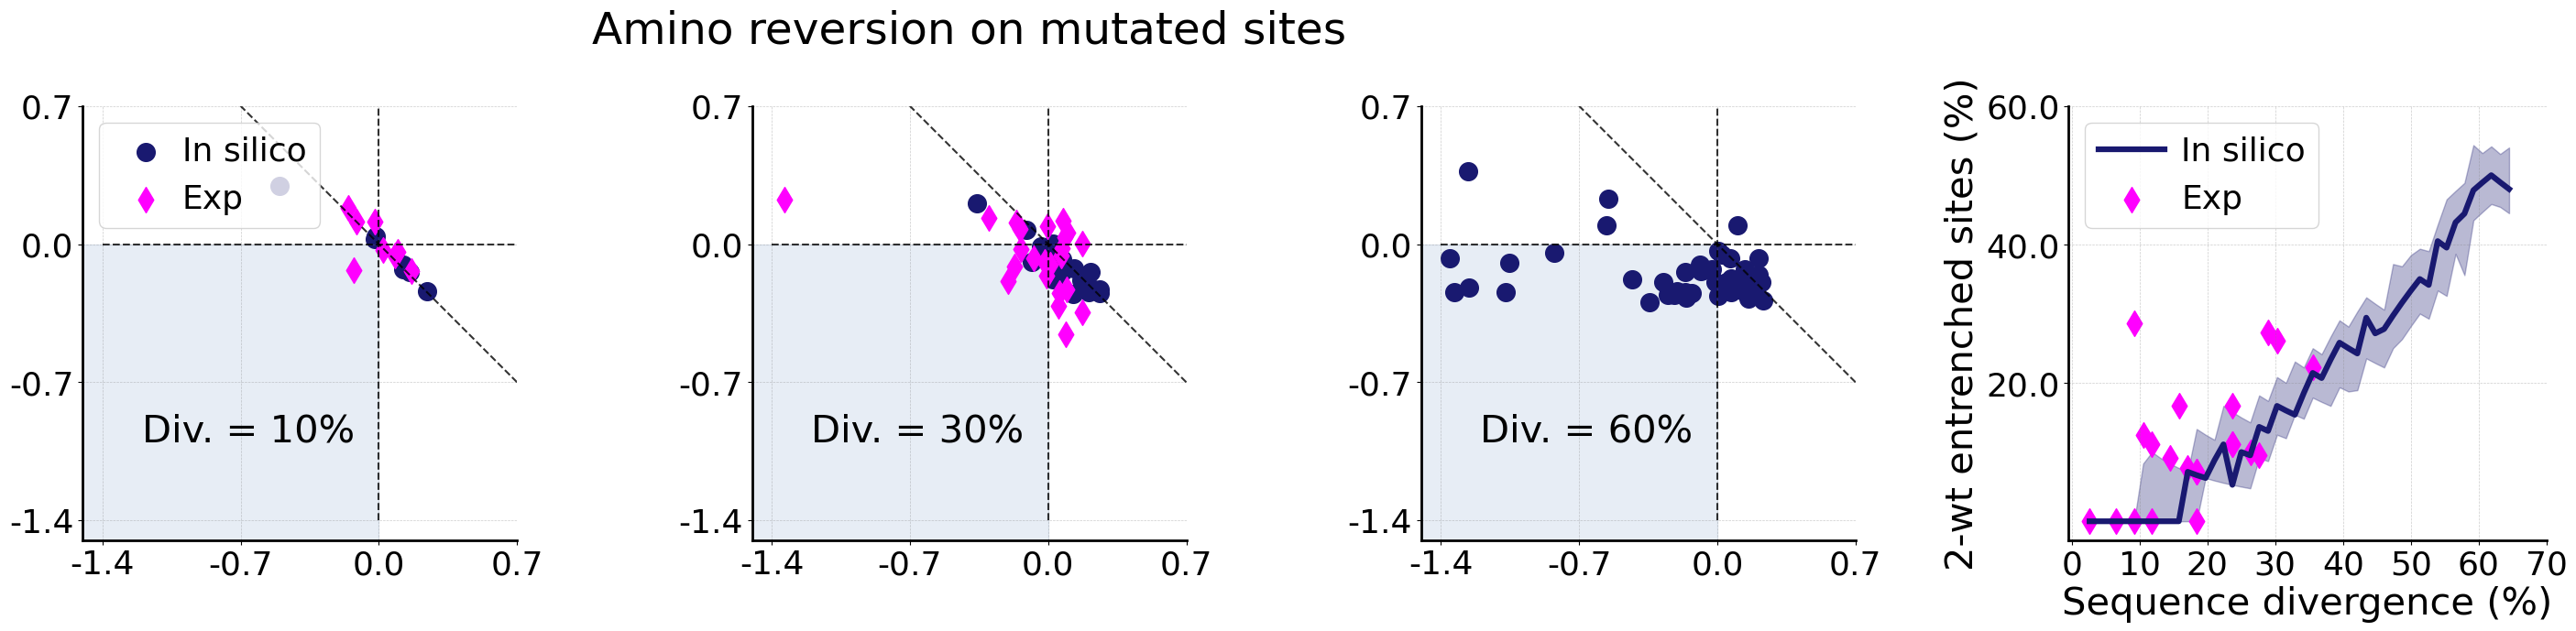

In [5]:
close("all")


axis_width = 2.

ticks_font = 26
axis_font = 30
spessore = 4.5
N_sites = 202
transp = 0.3

point = 200

lab0x = [-1.4, -0.7, 0., 0.7]
lab0y = lab0x

lab1x = [-1.4, -0.7, 0., 0.7]
lab1y = lab1x

lab2x = [-1.4, -0.7, 0., 0.7]
lab2y = lab2x

lab3x = [0,10,20,30, 40,50,60, 70]
lab3y = 100 .* [0.6, 0.4, 0.2]


cols = ["midnightblue", "magenta"]
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(35)
shapex = 1
shapey = 4

ax0 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)
ax1 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 1), colspan = 1, rowspan= 1)
ax2 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 2), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 3), colspan = 1, rowspan= 1)

ax0.fill_between([-1.5,0],[-100,-100], alpha = 0.3, color = "lightsteelblue")
ax0.scatter(E_ref10, E_seq10, s = point, color = cols[1], label = "In silico")
ax0.scatter(dF_ref10, dF_seq10, s = point, marker = "d", color = cols[2], label = "Exp")
ax0.plot([0,0],[lab0y[1], lab0y[end]], linestyle="--", alpha=0.8, color = "black")
ax0.plot([lab0x[1], lab0x[end]], [0,0], linestyle="--", alpha=0.8, color = "black")
ax0.plot([0.7,-0.7],[-0.7, 0.7], linestyle="--", alpha=0.8, color = "black")
ax0.spines["top"].set_visible(false)
ax0.spines["right"].set_visible(false)
ax0.spines["left"].set_linewidth(axis_width)
ax0.spines["bottom"].set_linewidth(axis_width)
ax0.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
#ax0.set_xlabel(raw"$\Delta{F_{\text{wt} \longrightarrow \text{seq}}}$", fontsize=axis_font)
#ax0.set_ylabel(raw"$\Delta{F_{\text{seq} \longrightarrow \text{wt}}}$", fontsize=axis_font)
#ax0.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
ax0.text(-1.2,-1, "Div. = 10%", fontsize = axis_font)
ax0.set_xticks(lab0x)
ax0.set_yticks(lab0y)
ax0.set_xticklabels(lab0x, fontsize=ticks_font)
ax0.set_yticklabels(lab0y, fontsize=ticks_font)
ax0.set_xlim(-1.5,0.7)
ax0.set_ylim(-1.5,0.7)
ax0.legend(fontsize = ticks_font, frameon = true, ncol = 1, loc = "upper left", handletextpad=0.1)
ax0.set_aspect("equal")

ax1.fill_between([-1.5,0],[-100,-100], alpha = 0.3, color = "lightsteelblue")
ax1.scatter(E_ref30, E_seq30, s = point, color = cols[1])
ax1.scatter(dF_ref30, dF_seq30, s = point, marker = "d", color = cols[2])
ax1.plot([0,0],[lab0y[1], lab0y[end]], linestyle="--", alpha=0.8, color = "black")
ax1.plot([lab0x[1], lab0x[end]], [0,0], linestyle="--", alpha=0.8, color = "black")
ax1.plot([0.7,-0.7],[-0.7, 0.7], linestyle="--", alpha=0.8, color = "black")
ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
#ax1.set_xlabel(raw"$\Delta{F_{\text{wt} \longrightarrow \text{seq}}}$", fontsize=axis_font)
#ax1.set_ylabel(raw"$\Delta{F_{\text{seq} \longrightarrow \text{wt}}}$", fontsize=axis_font)

#ax1.set_xlabel("\$\\Delta{F_{wt->seq}}\$", fontsize=axis_font)
#ax1.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
ax1.set_xticks(lab1x)
ax1.set_yticks(lab1y)
ax1.set_xticklabels(lab1x, fontsize=ticks_font)
ax1.set_yticklabels(lab1y, fontsize=ticks_font)
ax1.set_xlim(-1.5,0.7)
ax1.set_ylim(-1.5,0.7)
ax1.text(-1.2,-1, "Div. = 30%", fontsize = axis_font)
ax1.set_title("Amino reversion on mutated sites", fontsize=axis_font+5, pad = 50)
ax1.set_aspect("equal")

ax2.fill_between([-1.5,0],[-100,-100], alpha = 0.3, color = "lightsteelblue")
ax2.scatter(E_ref60, E_seq60, s = point, color = cols[1])
ax2.plot([0,0],[lab0y[1], lab0y[end]], linestyle="--", alpha=0.8, color = "black")
ax2.plot([lab0x[1], lab0x[end]], [0,0], linestyle="--", alpha=0.8, color = "black")
ax2.plot([0.7,-0.7],[-0.7, 0.7], linestyle="--", alpha=0.8, color = "black")
#ax2.set_xlabel(raw"$\Delta{F_{\text{wt} \longrightarrow \text{seq}}}$", fontsize=axis_font)
#ax2.set_ylabel(raw"$\Delta{F_{\text{seq} \longrightarrow \text{wt}}}$", fontsize=axis_font)

#ax2.set_xlabel("\$\\Delta{F_{wt->seq}}\$", fontsize=axis_font)
#ax2.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax2.text(-1.2,-1, "Div. = 60%", fontsize = axis_font)
ax2.set_xticks(lab1x)
ax2.set_yticks(lab1y)
ax2.set_xlim(-1.5,0.7)
ax2.set_ylim(-1.5,0.7)
ax2.set_xticklabels(lab2x, fontsize=ticks_font)
ax2.set_yticklabels(lab2y, fontsize=ticks_font)
ax2.set_aspect("equal")

ax3.plot(d[2:end], 100 .* median_abund, color = cols[1], linewidth = spessore, label = "In silico")
ax3.fill_between(d[2:end], 100 .* l_abund, 100 .* u_abund, color = cols[1], alpha = transp)
ax3.scatter(d_exp, 100 .* ab_m_exp, color = cols[2], marker = "d", s = point, label = "Exp")
ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax3.set_ylabel("2-wt entrenched sites (%)", fontsize=axis_font)
ax3.set_xticks(lab3x)
ax3.set_yticks(lab3y)
ax3.set_xticklabels(lab3x, fontsize = ticks_font)
ax3.set_yticklabels(lab3y, fontsize = ticks_font)
ax3.legend(fontsize = ticks_font, frameon = true, ncol = 1, loc = "upper left", handletextpad=0.5)

fig.subplots_adjust(top=0.9, wspace=0.4, hspace=0.4)
savefig("../data/figures/5AB.png", dpi = 300, bbox_inches="tight")

gcf()

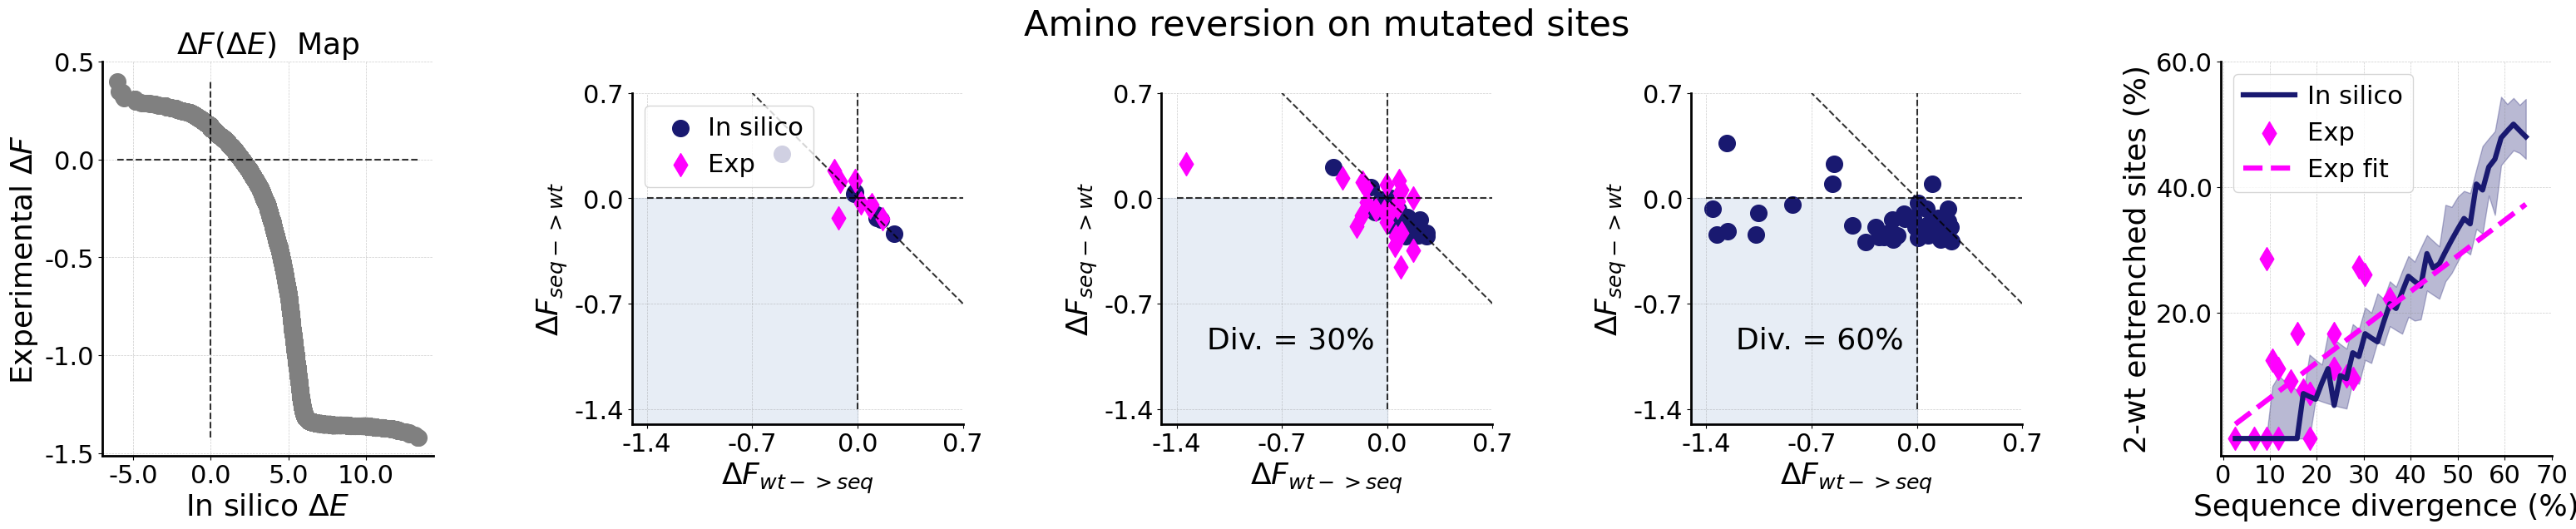

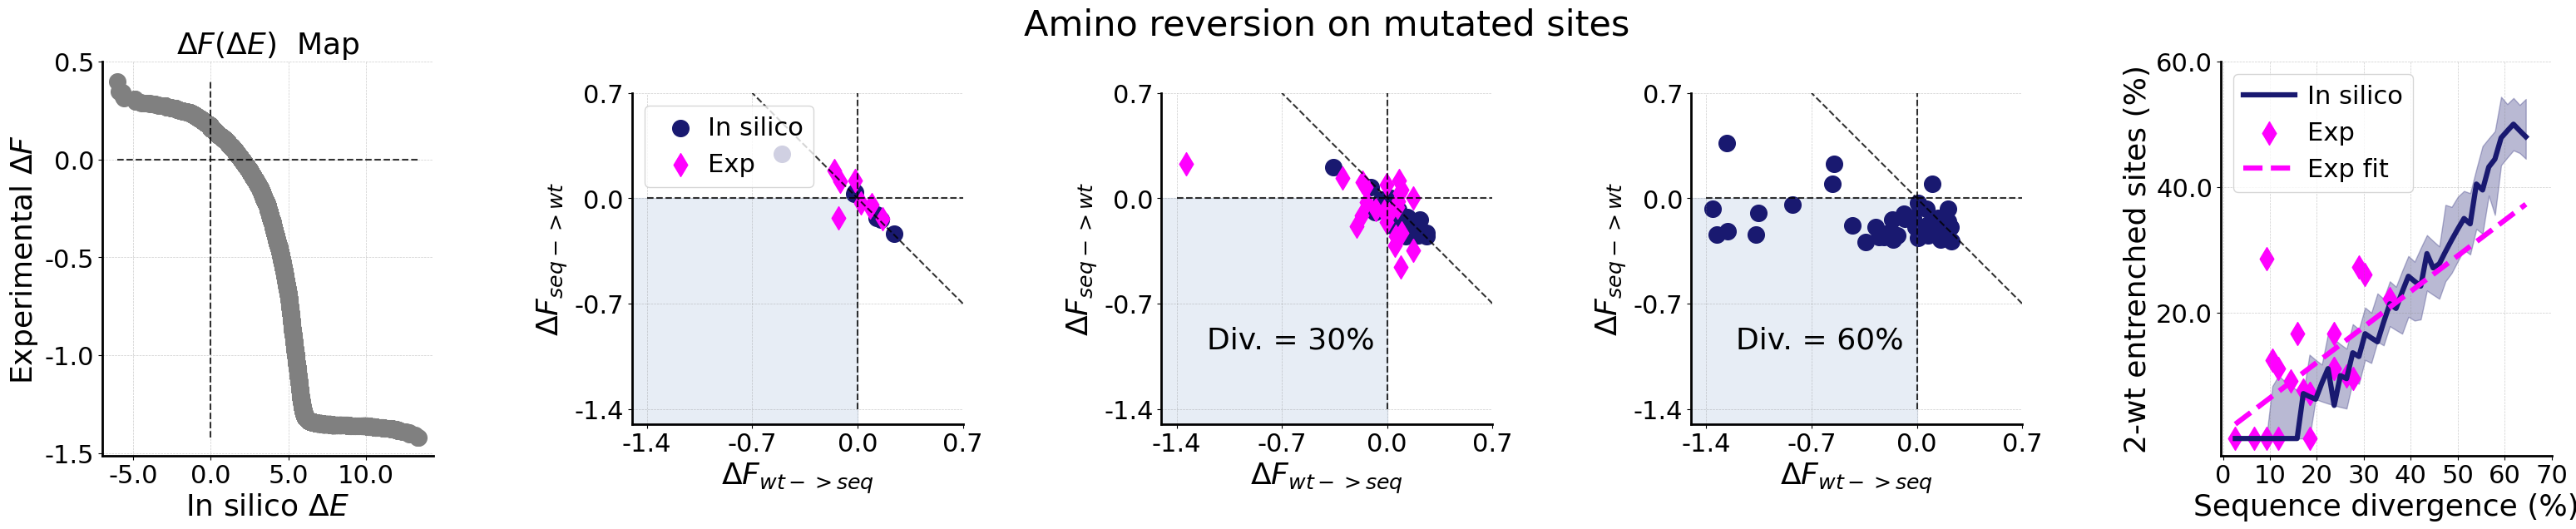

In [7]:
x = d_exp 
y = 100 .* ab_m_exp

# Create a DataFrame
data = DataFrame(x = x, y = y)

# Fit the linear model
model = lm(@formula(y ~ x), data)

# Get the coefficients
intercept = coef(model)[1]
slope = coef(model)[2]

# Define the regression line
regression_line(x) = intercept + slope * x



close("all")


axis_width = 2.

ticks_font = 22
axis_font = 26
spessore = 4.5
N_sites = 202
transp = 0.3

point = 200

labx = [-5., 0., 5.0, 10.]
laby = [-1.5, -1,-0.5, 0., 0.5]

lab0x = [-1.4, -0.7, 0., 0.7]
lab0y = lab0x

lab1x = [-1.4, -0.7, 0., 0.7]
lab1y = lab1x

lab2x = [-1.4, -0.7, 0., 0.7]
lab2y = lab2x

lab3x = [0,10,20,30, 40,50,60, 70]
lab3y = 100 .* [0.6, 0.4, 0.2]


cols = ["midnightblue", "magenta"]
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(38)
shapex = 1
shapey = 5

ax = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)
ax0 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 1), colspan = 1, rowspan= 1)
ax1 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 2), colspan = 1, rowspan= 1)
ax2 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 3), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 4), colspan = 1, rowspan= 1)


# plotting subplots
ax.scatter(dE, dF, color = "grey", s = point)
ax.plot([minimum(dE), maximum(dE)], [0, 0], color = "black", linestyle = "--", alpha = 0.8)
ax.plot([0, 0], [minimum(dF), maximum(dF)], color = "black", linestyle = "--", alpha = 0.8)

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.spines["left"].set_linewidth(axis_width)
ax.spines["bottom"].set_linewidth(axis_width)
ax.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax.set_ylabel("Experimental \$\\Delta{F}\$", fontsize=axis_font)
ax.set_xlabel("In silico \$\\Delta{E}\$", fontsize=axis_font)
ax.set_title("\$\\Delta{F}\$(\$\\Delta{E}\$)  Map", fontsize=axis_font)
ax.set_xticks(labx)
ax.set_yticks(laby)
ax.set_xticklabels(labx, fontsize = ticks_font)
ax.set_yticklabels(laby, fontsize = ticks_font)

ax0.fill_between([-1.5,0],[-100,-100], alpha = 0.3, color = "lightsteelblue")
ax0.scatter(E_ref10, E_seq10, s = point, color = cols[1], label = "In silico")
ax0.scatter(dF_ref10, dF_seq10, s = point, marker = "d", color = cols[2], label = "Exp")
ax0.plot([0,0],[lab0y[1], lab0y[end]], linestyle="--", alpha=0.8, color = "black")
ax0.plot([lab0x[1], lab0x[end]], [0,0], linestyle="--", alpha=0.8, color = "black")
ax0.plot([0.7,-0.7],[-0.7, 0.7], linestyle="--", alpha=0.8, color = "black")
ax0.spines["top"].set_visible(false)
ax0.spines["right"].set_visible(false)
ax0.spines["left"].set_linewidth(axis_width)
ax0.spines["bottom"].set_linewidth(axis_width)
ax0.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
#ax0.set_xlabel(raw"$\Delta{F_{\text{wt} \longrightarrow \text{seq}}}$", fontsize=axis_font)
#ax0.set_ylabel(raw"$\Delta{F_{\text{seq} \longrightarrow \text{wt}}}$", fontsize=axis_font)
ax0.set_xlabel("\$\\Delta{F_{wt->seq}}\$", fontsize=axis_font)
ax0.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
#ax0.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
#ax0.text(-1.2,-1, "Div. = 10%", fontsize = axis_font)
ax0.set_xticks(lab0x)
ax0.set_yticks(lab0y)
ax0.set_xticklabels(lab0x, fontsize=ticks_font)
ax0.set_yticklabels(lab0y, fontsize=ticks_font)
ax0.set_xlim(-1.5,0.7)
ax0.set_ylim(-1.5,0.7)
ax0.legend(fontsize = ticks_font, frameon = true, ncol = 1, loc = "upper left", handletextpad=0.1)
ax0.set_aspect("equal")

ax1.fill_between([-1.5,0],[-100,-100], alpha = 0.3, color = "lightsteelblue")
ax1.scatter(E_ref30, E_seq30, s = point, color = cols[1])
ax1.scatter(dF_ref30, dF_seq30, s = point, marker = "d", color = cols[2])
ax1.plot([0,0],[lab0y[1], lab0y[end]], linestyle="--", alpha=0.8, color = "black")
ax1.plot([lab0x[1], lab0x[end]], [0,0], linestyle="--", alpha=0.8, color = "black")
ax1.plot([0.7,-0.7],[-0.7, 0.7], linestyle="--", alpha=0.8, color = "black")
ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
#ax1.set_xlabel(raw"$\Delta{F_{\text{wt} \longrightarrow \text{seq}}}$", fontsize=axis_font)
#ax1.set_ylabel(raw"$\Delta{F_{\text{seq} \longrightarrow \text{wt}}}$", fontsize=axis_font)

ax1.set_xlabel("\$\\Delta{F_{wt->seq}}\$", fontsize=axis_font)
ax1.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
ax1.set_xticks(lab1x)
ax1.set_yticks(lab1y)
ax1.set_xticklabels(lab1x, fontsize=ticks_font)
ax1.set_yticklabels(lab1y, fontsize=ticks_font)
ax1.set_xlim(-1.5,0.7)
ax1.set_ylim(-1.5,0.7)
ax1.text(-1.2,-1, "Div. = 30%", fontsize = axis_font)
ax1.set_title("Amino reversion on mutated sites", fontsize=axis_font+5, pad = 50)
ax1.set_aspect("equal")

ax2.fill_between([-1.5,0],[-100,-100], alpha = 0.3, color = "lightsteelblue")
ax2.scatter(E_ref60, E_seq60, s = point, color = cols[1])
ax2.plot([0,0],[lab0y[1], lab0y[end]], linestyle="--", alpha=0.8, color = "black")
ax2.plot([lab0x[1], lab0x[end]], [0,0], linestyle="--", alpha=0.8, color = "black")
ax2.plot([0.7,-0.7],[-0.7, 0.7], linestyle="--", alpha=0.8, color = "black")
#ax2.set_xlabel(raw"$\Delta{F_{\text{wt} \longrightarrow \text{seq}}}$", fontsize=axis_font)
#ax2.set_ylabel(raw"$\Delta{F_{\text{seq} \longrightarrow \text{wt}}}$", fontsize=axis_font)

ax2.set_xlabel("\$\\Delta{F_{wt->seq}}\$", fontsize=axis_font)
ax2.set_ylabel("\$\\Delta{F_{seq->wt}}\$", fontsize=axis_font)
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax2.text(-1.2,-1, "Div. = 60%", fontsize = axis_font)
ax2.set_xticks(lab1x)
ax2.set_yticks(lab1y)
ax2.set_xlim(-1.5,0.7)
ax2.set_ylim(-1.5,0.7)
ax2.set_xticklabels(lab2x, fontsize=ticks_font)
ax2.set_yticklabels(lab2y, fontsize=ticks_font)
ax2.set_aspect("equal")

ax3.plot(d[2:end], 100 .* median_abund, color = cols[1], linewidth = spessore, label = "In silico")
ax3.fill_between(d[2:end], 100 .* l_abund, 100 .* u_abund, color = cols[1], alpha = transp)
ax3.scatter(d_exp, 100 .* ab_m_exp, color = cols[2], marker = "d", s = point, label = "Exp")
ax3.plot(d[2:end], regression_line.(d[2:end]), linestyle="--", linewidth = spessore, label="Exp fit", color=cols[2])
ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax3.set_ylabel("2-wt entrenched sites (%)", fontsize=axis_font)
ax3.set_xticks(lab3x)
ax3.set_yticks(lab3y)
ax3.set_xticklabels(lab3x, fontsize = ticks_font)
ax3.set_yticklabels(lab3y, fontsize = ticks_font)
ax3.legend(fontsize = ticks_font, frameon = true, ncol = 1, loc = "upper left", handletextpad=0.5)

fig.subplots_adjust(top=0.9, wspace=0.6, hspace=0.6)
savefig("../data/figures/5ABnew.png", dpi = 300, bbox_inches="tight")

gcf()

In [7]:
# Fig C
dms_ref60 = readdlm("../data/figures/data_fig5/dms_ref60.0")[:]
dms_ref30 = readdlm("../data/figures/data_fig5/dms_ref30.0")[:]
dms_ref10 = readdlm("../data/figures/data_fig5/dms_ref10.0")[:]
dms_seq60 = readdlm("../data/figures/data_fig5/dms_seq60.0")[:]
dms_seq30 = readdlm("../data/figures/data_fig5/dms_seq30.0")[:]
dms_seq10 = readdlm("../data/figures/data_fig5/dms_seq10.0")[:]

# Fig D
d_red = readdlm("../data/figures/data_fig5/reduced_d")[:]

m = readdlm("../data/figures/data_fig5/m")[:]
l_m = readdlm("../data/figures/data_fig5/l_m")[:]
u_m = readdlm("../data/figures/data_fig5/u_m")[:]

nm = readdlm("../data/figures/data_fig5/nm")[:]
l_nm = readdlm("../data/figures/data_fig5/l_nm")[:]
u_nm = readdlm("../data/figures/data_fig5/u_nm")[:]

corr_m_exp = readdlm("../data/figures/data_fig5/corr_m_exp")[:]
corr_nm_exp = readdlm("../data/figures/data_fig5/corr_nm_exp")[:]

# Fig E
m_std_dde_mut = readdlm("../data/figures/data_fig5/m_std_dde_mut")[:]
m_std_dde_nonmut = readdlm("../data/figures/data_fig5/m_std_dde_nonmut")[:]

l_std_dde_mut = readdlm("../data/figures/data_fig5/l_std_dde_mut")[:]
l_std_dde_nonmut = readdlm("../data/figures/data_fig5/l_std_dde_nonmut")[:]

u_std_dde_mut = readdlm("../data/figures/data_fig5/u_std_dde_mut")[:]
u_std_dde_nonmut = readdlm("../data/figures/data_fig5/u_std_dde_nonmut")[:]

s_dde_m_exp = readdlm("../data/figures/data_fig5/s_dde_m_exp")[:]
s_dde_nm_exp = readdlm("../data/figures/data_fig5/s_dde_nm_exp")[:]
;

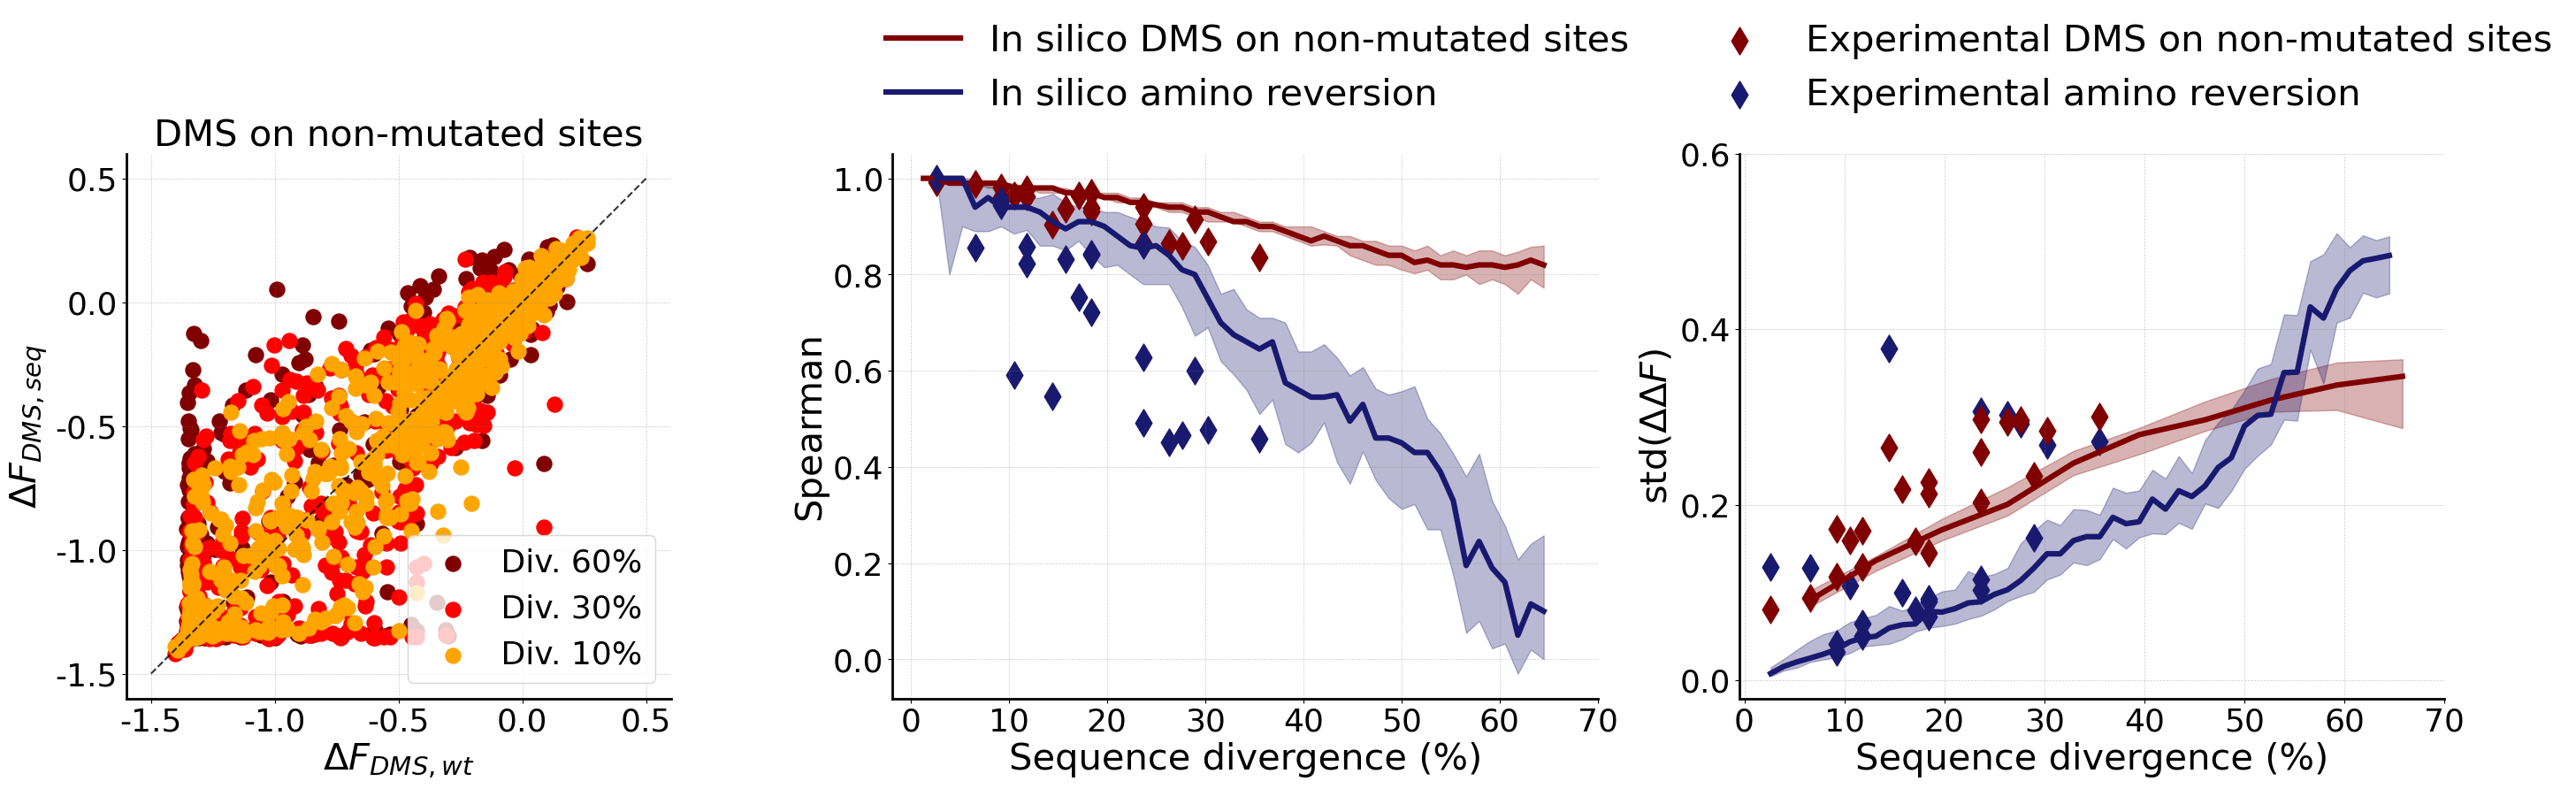

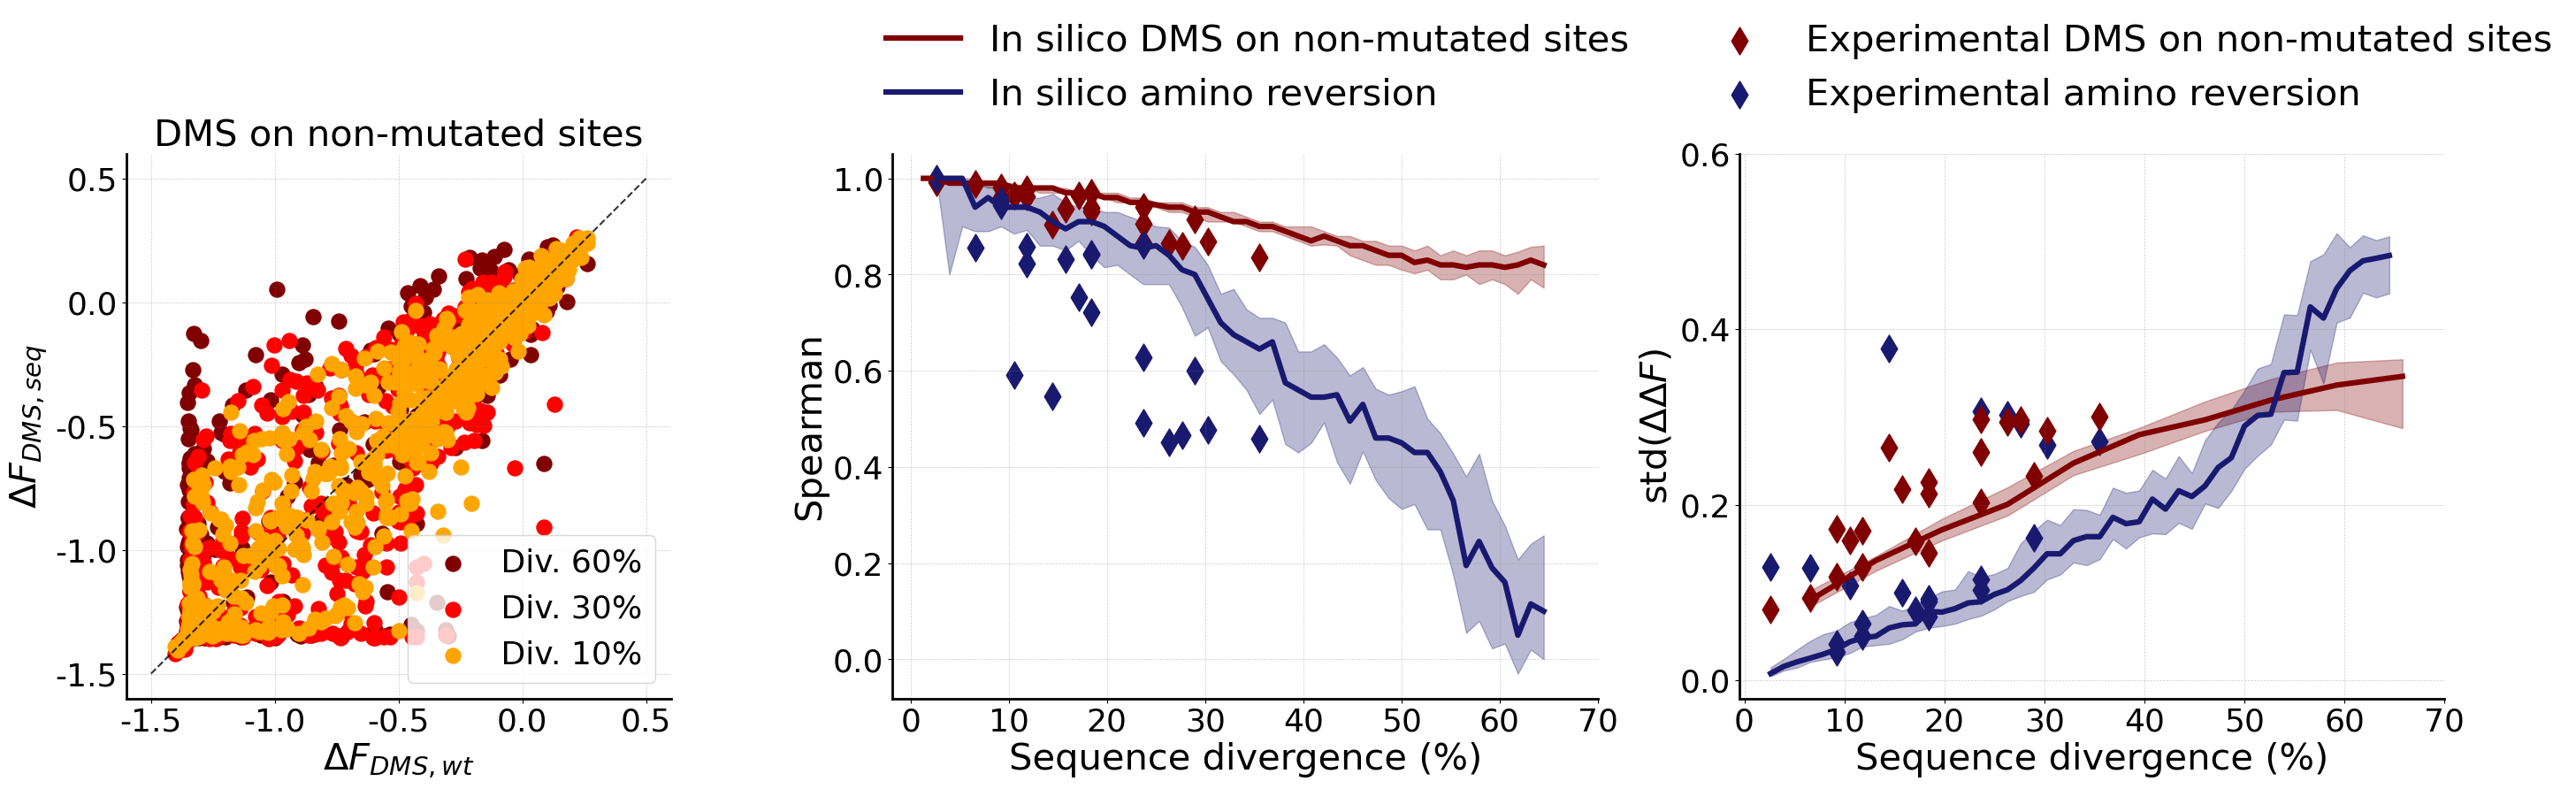

In [8]:
close("all")


axis_width = 2.

ticks_font = 26
axis_font = 30
spessore = 4.5
N_sites = 202
transp = 0.3

point = 150

cols = ["maroon", "midnightblue"]

lab1x = [-1.5, -1., - 0.5, 0, 0.5]
lab1y = lab1x

lab2x = [0,10,20,30, 40,50,60, 70]
lab2y = [1, 0.8, 0.6, 0.4, 0.2, 0]


lab3x = [0,10,20,30, 40,50,60, 70]
lab3y = [0, 0.2, 0.4, 0.6]

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(35)
shapex = 1
shapey = 3

ax1 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)
ax2 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 1), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 2), colspan = 1, rowspan= 1)

# plotting subplots
ax1.scatter(dms_ref60, dms_seq60, s = point, color = "maroon", label = " Div. 60%")
ax1.scatter(dms_ref30, dms_seq30, s = point, color = "red", label = " Div. 30%")
ax1.scatter(dms_ref10, dms_seq10, s = point, color = "orange", label = " Div. 10%")
ax1.plot([minimum(lab1x), maximum(lab1x)], [minimum(lab1x), maximum(lab1x)], linestyle="--", alpha = 0.8,
 color = "black")

ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
#ax0.set_xlabel(raw"$\Delta{F_{\text{DMS,wt}}$", fontsize=axis_font)
#ax0.set_xlabel(raw"$\Delta{F_{\text{DMS,wt}}$", fontsize=axis_font)

ax1.set_xlabel("\$\\Delta{F_{DMS,wt}}\$", fontsize=axis_font)
ax1.set_ylabel("\$\\Delta{F_{DMS,seq}}\$", fontsize=axis_font)
ax1.set_title("DMS on non-mutated sites", fontsize=axis_font)
ax1.set_xticks(lab1x)
ax1.set_yticks(lab1y)
ax1.set_xticklabels(lab1x, fontsize = ticks_font)
ax1.set_yticklabels(lab1y, fontsize = ticks_font)
ax1.set_aspect("equal")
ax1.legend(fontsize = ticks_font, frameon = true, ncol = 1, loc = "lower right", handletextpad=0.2)

# plotting subplots
ax2.plot(d, nm, color=cols[1], linewidth = spessore, label="In silico DMS on non-mutated sites")
ax2.fill_between(d, l_nm, u_nm, color=cols[1], alpha=transp)

ax2.plot(d[2:end], .-m, color=cols[2], linewidth = spessore, label= "In silico amino reversion")
ax2.fill_between(d[2:end], .-l_m, .-u_m, color=cols[2], alpha=transp)

ax2.scatter(d_exp, corr_nm_exp, color=cols[1], s=point+100, marker = "d", label="Experimental DMS on non-mutated sites")
ax2.scatter(d_exp, .-corr_m_exp, color=cols[2], s=point+100, marker = "d", label="Experimental amino reversion")

ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax2.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax2.set_ylabel("Spearman", fontsize=axis_font)
#ax2.set_title("Amino reversion\n on non-mutated sites", fontsize=axis_font)
ax2.set_xticks(lab2x)
ax2.set_yticks(lab2y)
ax2.set_xticklabels(lab2x, fontsize=ticks_font)
ax2.set_yticklabels(lab2y, fontsize=ticks_font)


# plotting subplots
ax3.plot(d_red, m_std_dde_nonmut, color=cols[1], linewidth = spessore, label="In silico DMS on non-mutated sites")
ax3.fill_between(d_red, l_std_dde_nonmut, u_std_dde_nonmut, color=cols[1], alpha=transp)

ax3.plot(d[2:end], m_std_dde_mut, color=cols[2], linewidth = spessore, label="In silico amino reversion")
ax3.fill_between(d[2:end], l_std_dde_mut, u_std_dde_mut, color=cols[2], alpha=transp)

ax3.scatter(d_exp, s_dde_m_exp, color=cols[2], s=point+100, marker = "d", label=" Experimental amino reversion")
ax3.scatter(d_exp, s_dde_nm_exp, color=cols[1], s=point+100, marker = "d", label=" Experimental DMS on non-mutated sites")

ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax3.set_ylabel("std(\$\\Delta\$\$\\Delta{F}\$)", fontsize=axis_font)
#ax3.set_title("Amino reversion\n on mutated sites", fontsize=axis_font)
ax3.set_xticks(lab3x)
ax3.set_yticks(lab3y)
ax3.set_xticklabels(lab3x, fontsize = ticks_font)
ax3.set_yticklabels(lab3y, fontsize = ticks_font)
#ax3.legend(fontsize = ticks_font, frameon = true, ncol = 2, loc = "upper left", handletextpad=0.2)
ax2.legend(fontsize=axis_font, frameon=false, ncol = 2, bbox_to_anchor=(2.4, 1.3))
#fig.tight_layout(pad=3.0)
savefig("../data/figures/5CD.png", dpi = 300, bbox_inches="tight")
gcf()

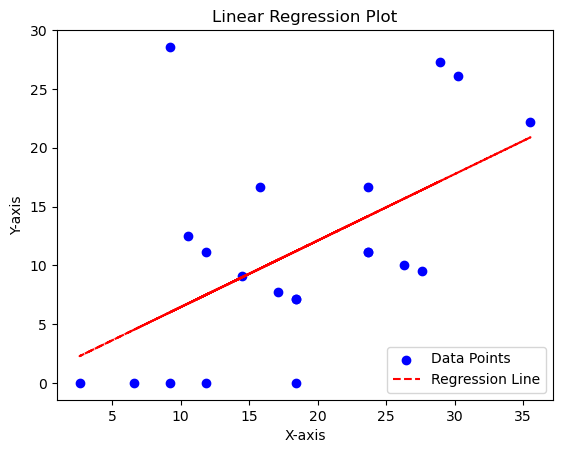

In [19]:


# Sample data


# Plot the data points
scatter(x, y, label="Data Points", color="blue")

# Plot the regression line


# Add labels and legend
xlabel("X-axis")
ylabel("Y-axis")
title("Linear Regression Plot")
legend()

# Display the plot
show()
